# Import Modules

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [2]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

def plot_reg_history(history_fine):
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

# 1.NHẬN DẠNG KHUÔN MẶT (ANN)

## 1.1 Load Data

In [111]:
# Load Data 
with open('Data_AI1.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

# Reshape Data
x_pre = x_train[95]
x_train = x_train[:210]
y_train = y_train[:210]
x_train = x_train.reshape(x_train.shape[0], -1)

# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 2)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

## 1.2 Create Model

Epoch 1/50
6/6 [==============================] - 2s 61ms/step - loss: 0.6897 - acc: 0.4762 - val_loss: 0.7048 - val_acc: 0.3333
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 0.6657 - acc: 0.4762 - val_loss: 0.6361 - val_acc: 0.3333
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 0.5639 - acc: 0.4762 - val_loss: 0.5783 - val_acc: 0.3333
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 0.4833 - acc: 0.4762 - val_loss: 0.5380 - val_acc: 0.3333
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 0.4321 - acc: 0.4762 - val_loss: 0.5046 - val_acc: 0.3333
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 0.3952 - acc: 0.4762 - val_loss: 0.4852 - val_acc: 0.3333
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 0.3820 - acc: 0.4762 - val_loss: 0.4792 - val_acc: 0.3333
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 0.3700 - acc: 0.6905 - val

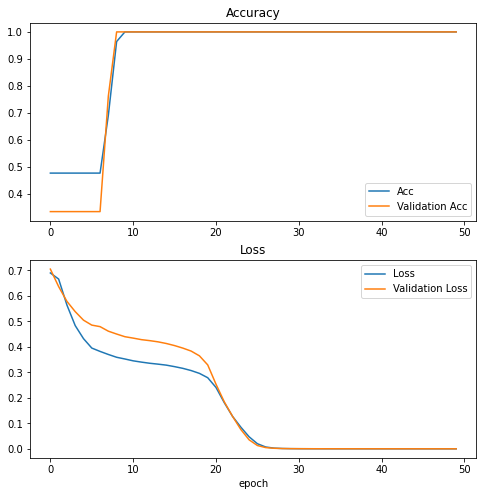

In [112]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape = (67500,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer =Adam(), metrics=['acc'])

history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.2)

plot_history(history)

## 1.3 Predict

(150, 150, 3)


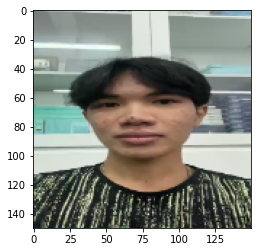

In [113]:
# Load Test Image
plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB))
print(x_pre.shape)
img = x_pre.reshape(1,-1)
img = img.astype('float32')
img /= 255

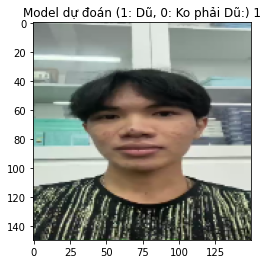

In [114]:
plt.title("Model dự đoán (1: Dũ, 0: Ko phải Dũ:) " + str(np.argmax(model.predict(img))))
plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

# 2. Nhận Dạng Khuôn Mặt (CNN)

## 2.1 Load Data

In [70]:
# Load Data 
with open('Data_AI1.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

# Reshape Data

x_pre_1 = x_train[211]
x_pre_2 = x_train[364]
x_pre_3 = x_train[451]


# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 4)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

## 2.2 Create Model

In [71]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_37 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [72]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_split = 0.2)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6/6 [==============================] - 3s 301ms/step - loss: 7.0358 - acc: 0.2992 - val_loss: 0.9716 - val_acc: 0.4945
Epoch 2/15
6/6 [==============================] - 2s 254ms/step - loss: 0.4987 - acc: 0.8864 - val_loss: 0.0609 - val_acc: 1.0000
Epoch 3/15
6/6 [==============================] - 2s 255ms/step - loss: 0.0153 - acc: 1.0000 - val_loss: 1.1568e-04 - val_acc: 1.0000
Epoch 4/15
6/6 [==============================] - 2s 255ms/step - loss: 1.1765e-04 - acc: 1.0000 - val_loss: 1.3218e-06 - val_acc: 1.0000
Epoch 5/15
6/6 [==============================] - 2s 255ms/step - loss: 1.5263e-06 - acc: 1.0000 - val_loss: 3.2619e-07 - val_acc: 1.0000
Epoch 6/15
6/6 [==============================] - 2s 255ms/step - loss: 4.8080e-07 - acc: 1.0000 - val_loss: 1.2576e-07 - val_acc: 1.0000
Epoch 7/15
6/6 [==============================] - 2s 257ms/step - loss: 3.1272e-07 - acc: 1.0000 - val_loss: 8.7769e-08 - val_acc: 1.0000
Epoch 8/15
6/6 [==============================] - 1s 254ms/step -

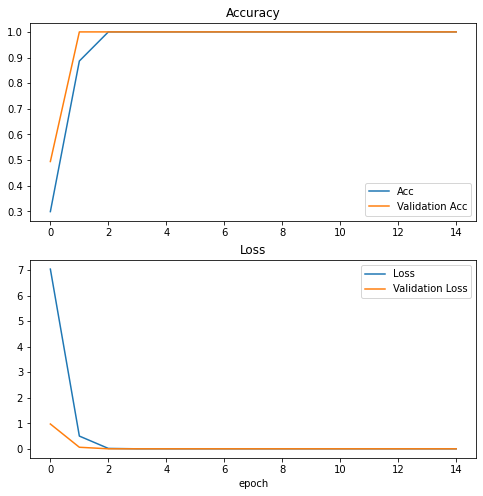

In [73]:
plot_history(his)

## 2.3 Predict

In [74]:
label = ['None','Dũ', 'Tuyên', 'Tuấn']

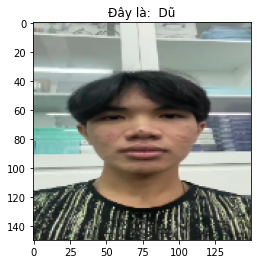

In [75]:
plt.title("Đây là:  " + label[np.argmax(model.predict(x_pre_1.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

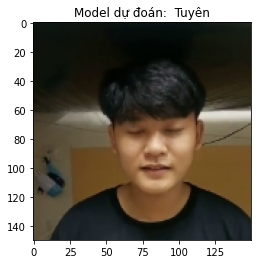

In [76]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_2.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_2, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

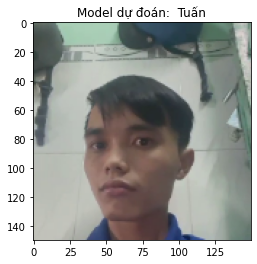

In [77]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_3.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_3, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))